### Demonstration of the LsstCameraFootprint ###

The `LsstCameraFootprint` is a class that reads a pre-calculated footprint map for the LSST camera field of view (which includes chip gaps) and then when provided with a list of either pointings of interest, or one object pointing but several boresight pointings, returns the indexes of the points which landed on silicon. 

The footprint map is derived from the LSST DM camera model in `obs_lsst`.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from rubin_scheduler.data import get_data_dir
from rubin_scheduler.utils import LsstCameraFootprint

In [3]:
pointing_ra = np.radians(15)
pointing_dec = np.radians(-20)
pointing_rot = np.radians(0)

In [4]:
# The "units" describe whether the boresight and test points are in 'radians' or 'degrees'
# The "footprint_file" describes where to find the fov map. 
# This can be in RUBIN_SIM_DATA_DIR/tests or RUBIN_SIM_DATA_DIR/maf.

camera = LsstCameraFootprint(units='radians')

In [5]:
# What happens if we pass one point, near the center of the fov?
eps = 0.00001
camera([pointing_ra+eps], [pointing_dec], pointing_ra, pointing_dec, 0)

array([0])

Text(0, 0.5, 'Dec (radians)')

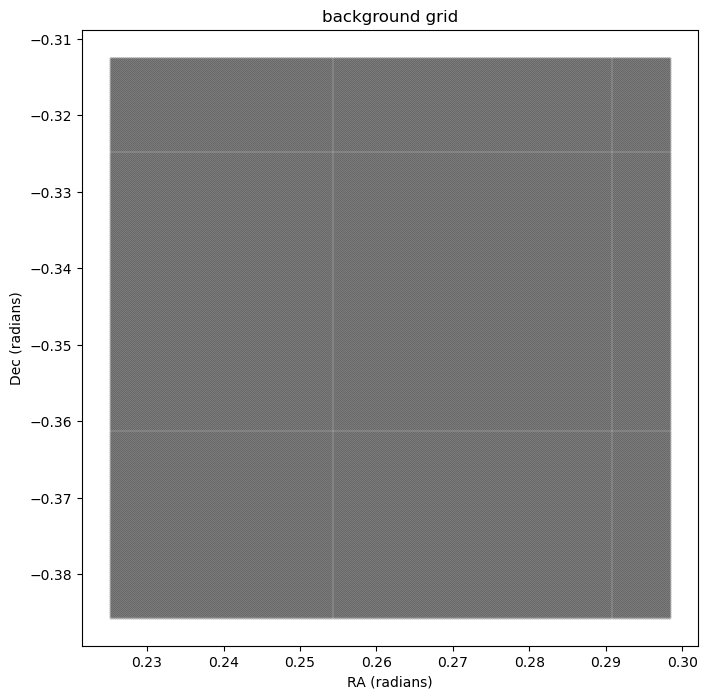

In [6]:
# Okay, let's set up a grid across and slightly beyond a whole FOV
radius = np.radians(2.1)
stepsize = np.radians(0.005)
ra = np.arange(pointing_ra - radius, pointing_ra + radius, stepsize)
dec = np.arange(pointing_dec - radius, pointing_dec + radius, stepsize)
ra, dec = np.meshgrid(ra, dec)
ra = ra.flatten()
dec = dec.flatten()

m=0.1  # set markersize 
plt.figure(figsize=(8,8))
plt.plot(ra, dec, 'k.', markersize=m)
plt.title('background grid')
plt.axis('square')
plt.xlabel('RA (radians)')
plt.ylabel('Dec (radians)')

In [7]:
# Find which points fall onto the camera
idx = camera(ra, dec, pointing_ra, pointing_dec, pointing_rot)
idx

array([ 67743,  67744,  67745, ..., 640332, 640333, 640334])

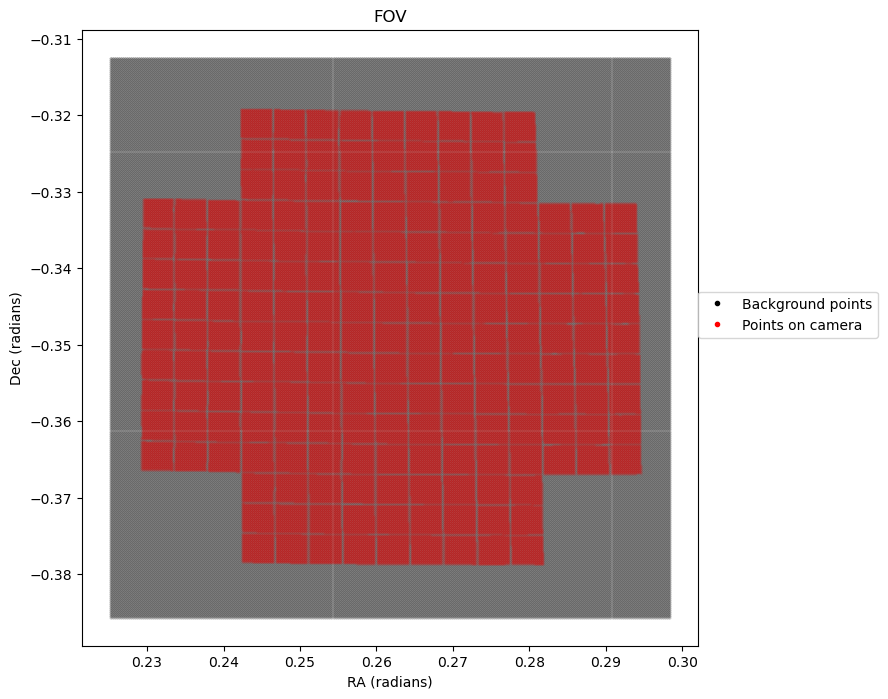

In [8]:
plt.figure(figsize=(8,8))
plt.plot(ra, dec, 'k.', markersize=m)
plt.plot(ra[idx], dec[idx], 'r.', markersize=m)
plt.title('FOV')
plt.axis('square')
plt.xlabel('RA (radians)')
plt.ylabel('Dec (radians)')
plt.plot(1.0, 0.5, 'k.', label='Background points')
plt.plot(1.0, 0.4, 'r.', label='Points on camera')
plt.legend(loc=(1.0, 0.5))

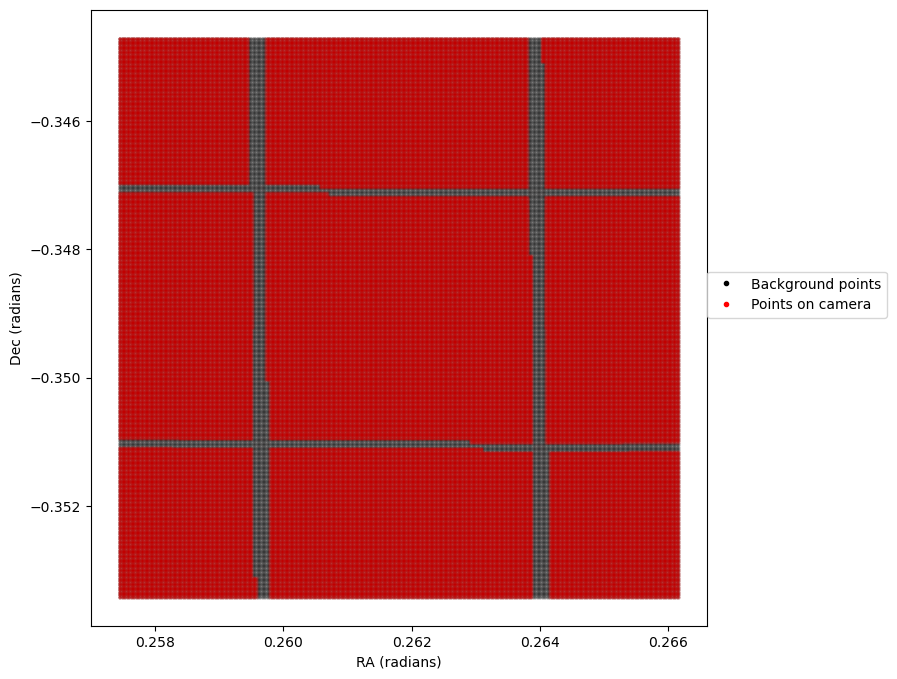

In [9]:
# zoom in .. 
radius = np.radians(.25)
stepsize = np.radians(0.0005)
ra = np.arange(pointing_ra - radius, pointing_ra + radius, stepsize)
dec = np.arange(pointing_dec - radius, pointing_dec + radius, stepsize)
ra, dec = np.meshgrid(ra, dec)
ra = ra.flatten()
dec = dec.flatten()
idx = camera(ra, dec, pointing_ra, pointing_dec, pointing_rot)

plt.figure(figsize=(8,8))
plt.plot(ra, dec, 'k.', markersize=m)
plt.plot(ra[idx], dec[idx], 'r.', markersize=m)
plt.axis('square')
plt.xlabel('RA (radians)')
plt.ylabel('Dec (radians)')
plt.plot(1.0, 0.5, 'k.', label='Background points')
plt.plot(1.0, 0.4, 'r.', label='Points on camera')
plt.legend(loc=(1.0, 0.5))

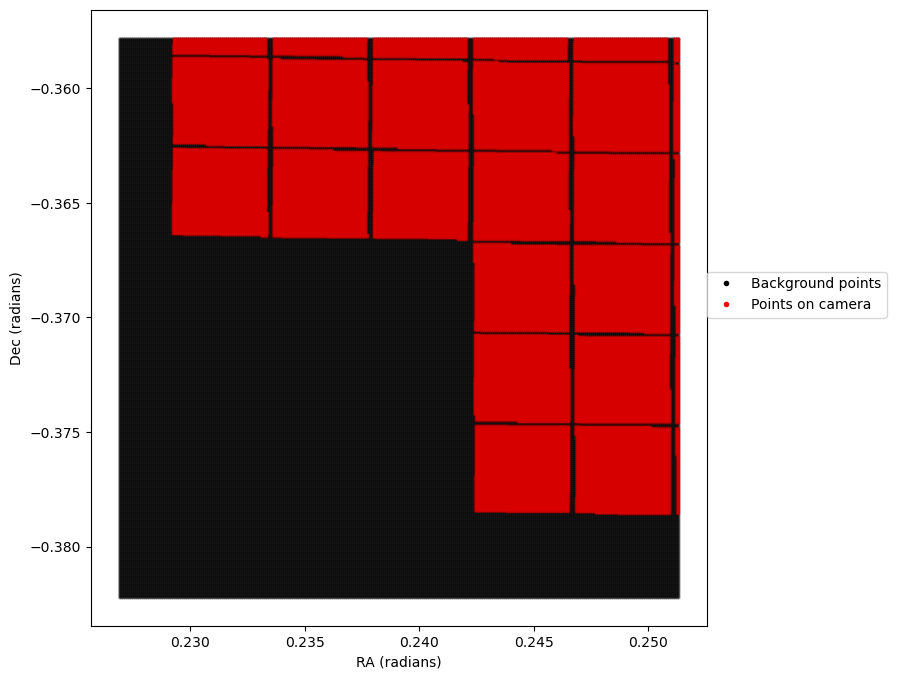

In [10]:
radius = np.radians(0.7)
stepsize = np.radians(0.001)
offset_ra = np.radians(1.3)
offset_dec = np.radians(1.2)
ra = np.arange(pointing_ra - radius - offset_ra, pointing_ra + radius - offset_ra, stepsize)
dec = np.arange(pointing_dec - radius - offset_dec, pointing_dec + radius - offset_dec, stepsize)
ra, dec = np.meshgrid(ra, dec)
ra = ra.flatten()
dec = dec.flatten()
idx = camera(ra, dec, pointing_ra, pointing_dec, pointing_rot)

plt.figure(figsize=(8,8))
plt.plot(ra, dec, 'k.', markersize=m)
plt.plot(ra[idx], dec[idx], 'r.', markersize=m)
plt.axis('square')
plt.xlabel('RA (radians)')
plt.ylabel('Dec (radians)')
plt.plot(1.0, 0.5, 'k.', label='Background points')
plt.plot(1.0, 0.4, 'r.', label='Points on camera')
plt.legend(loc=(1.0, 0.5))